In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
#import tensorflow_addons as tfa
#print(tfa.__version__)
import pickle
import json

In [2]:
with open('../resources/ImageNet/Silhouette/d=256/256D_embeddings_inet_clusters.json') as infile:
  clusters = json.load(infile)


In [3]:
keys = list(clusters['class_id'].keys())


In [5]:
clusters['class_id']


{'10003327': {'best_k': 2,
  'avg_silhouette': 0.6338420561517609,
  'cluster_ids': [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 '10008016': {'best_k': 2,
  'avg_silhouette': 0.7060119316235075,
  'cluster_ids': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 '10010617': {'best_k': 7,
  'avg_silhouette': 0.5473864251778104,
  'cluster_ids': [1,
   5,
   5,
   5,
   4,
   5,
   4,
   5,
   5,
   6,
   1,
   4,
   0,
   5,
   4,
   0,
   2,
   0,
   6,
   2,
   3,
   2,
   4,
   2,
   5,
   0,
   0,
   3,
   0,
   0,
   1,
   6,
   0,
   5,
   6,
   2,
   6,
   6,
   4,
   3,
   4,
   6,
   0,
   5,
   5,
   4,
   0,
   4,
   5,
   5,
   2,
   4,
   5,
   3,
   6,
   6,
   6,
   5,
   5,
   3,
   4,
   0,
   6,
   0,
   2,
   5,
   5,
   0,
   3,
   6,
   5,
   6,
   6,
   6,
   0,
   0,
   0,
   0,
   6,
   3,
   5,
   5,
   6,
   5,
   4,
   1,
   5,
   2,
   2,
   6,
   0,
   2,
   0,
   6,
   1,
   6,
   5,
   5,
   0,
   0,
   6]},
 '10012036': {'best_k': 3,
  'avg_silhouette': 0.

1.0
0.047253236174583435


0.9999996151435371
0.437213327649102


Text(0.5, 1.0, 'Frequência de Classes x Best Silhouette (20 runs)')

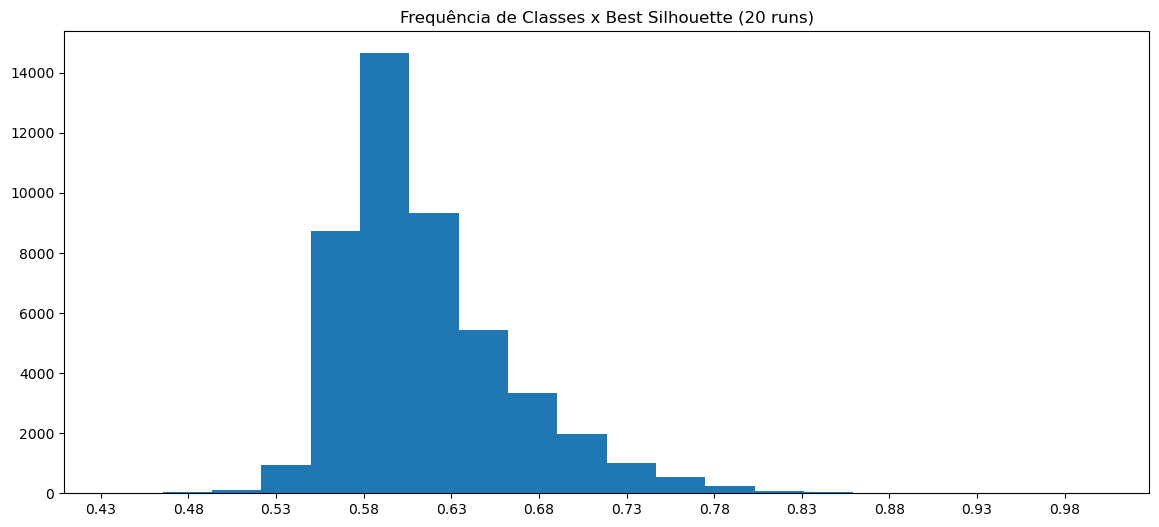

In [6]:
silhouette_coefficients = [clusters['class_id'][key]['avg_silhouette'] for key in keys]

m = silhouette_coefficients[np.argmax(silhouette_coefficients)]
print(m)
mmin = silhouette_coefficients[np.argmin(silhouette_coefficients)]
print(mmin)

N_points = len(silhouette_coefficients)
n_bins = 20
length = (m - mmin)/n_bins
fig, axs = plt.subplots(figsize=(14,6))
#length = 0.025
#plt.figure(figsize=(10,6))
#0.592653975517827
# We can set the number of bins with the *bins* keyword argument.
plt.xticks(np.arange(0.03, 1, 0.05))
axs.hist(silhouette_coefficients, bins=n_bins)
#plt.xlim(right=0.9)
plt.title('Frequência de Classes x Best Silhouette (20 runs)')
#xlim(left=1)

#axs[1].hist(dist2, bins=n_bins)

In [7]:
no_clusters = [clusters['class_id'][key]['best_k'] for key in keys]

m = no_clusters[np.argmax(no_clusters)]
print(m)
mmin = no_clusters[np.argmin(no_clusters)]
print(mmin)

10
2


Text(0.5, 1.0, 'Frequência de Classes x K-Means best-K (Silhouette)')

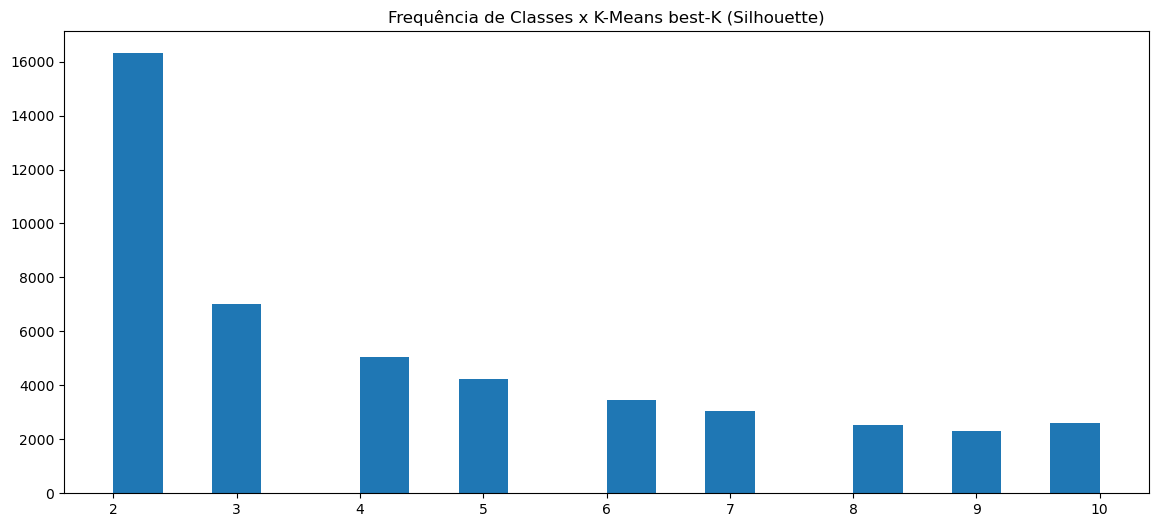

In [9]:


N_points = len(no_clusters)
n_bins = 20
length = (m - mmin)/n_bins
fig, axs = plt.subplots(figsize=(14,6))
#length = 0.025
#plt.figure(figsize=(10,6))
#0.592653975517827
# We can set the number of bins with the *bins* keyword argument.
plt.xticks(np.arange(1, 11, 1))
axs.hist(no_clusters, bins=n_bins)
#plt.xlim(right=0.9)
plt.title('Frequência de Classes x K-Means best-K (Silhouette)')
#xlim(left=1)

#axs[1].hist(dist2, bins=n_bins)